In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

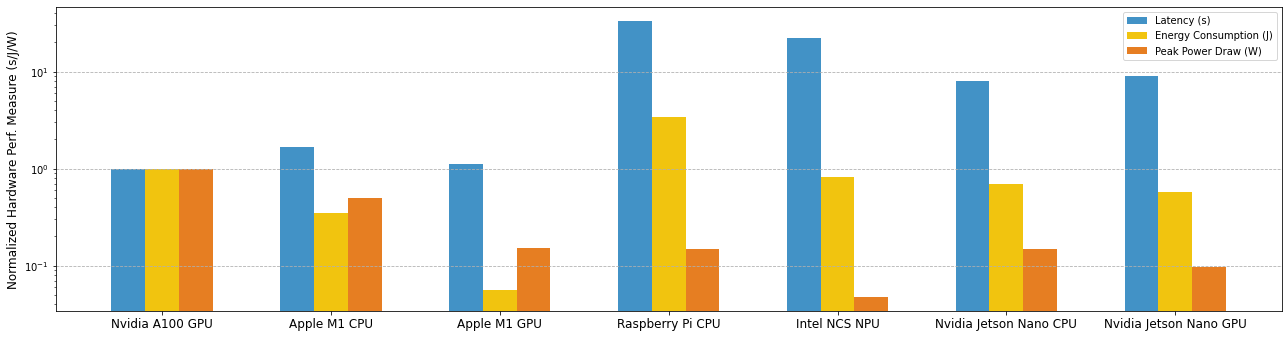

In [3]:
latency = {'Nvidia A100 GPU': 3.52,
           'Apple M1 CPU': 5.88, 
           'Apple M1 GPU': 3.89, 
           'Raspberry Pi CPU': 117.69,
           'Intel NCS NPU': 78.42,
           'Nvidia Jetson Nano CPU': 28.16,
           'Nvidia Jetson Nano GPU': 31.84} # s
energy = {'Nvidia A100 GPU': 134.19, 
          'Apple M1 CPU': 47.09, 
          'Apple M1 GPU': 7.62,
          'Raspberry Pi CPU': 452.41,
          'Intel NCS NPU': 109.25,
          'Nvidia Jetson Nano CPU': 93.77,
          'Nvidia Jetson Nano GPU': 77.76} # J
power = {'Nvidia A100 GPU': 42,
         'Apple M1 CPU': 20.8, 
         'Apple M1 GPU': 6.4,
         'Raspberry Pi CPU': 6.2,
         'Intel NCS NPU': 2,
         'Nvidia Jetson Nano CPU': 6.2,
         'Nvidia Jetson Nano GPU': 4.1} # W

colors = {'latency': '#4292C6', 'energy': '#F1C40F', 'power': '#E67E22'}
metric_labels = {'latency': 'Latency (s)', 'energy': 'Energy Consumption (J)', 'power': 'Peak Power Draw (W)'}

x = np.arange(len(latency))

width = 0.2
fig, ax = plt.subplots(figsize=(18, 4.8))

count = 0
for metric in metric_labels.keys():
    if metric == 'latency':
        values = latency.values()
        baseline_value = latency['Nvidia A100 GPU']
    elif metric == 'energy':
        values = energy.values()
        baseline_value = energy['Nvidia A100 GPU']
    else:
        values = power.values()
        baseline_value = power['Nvidia A100 GPU']
    ax.bar(x - 1*width + width*count, [value/baseline_value for value in values], 
         width, label=metric_labels[metric], color=colors[metric])
    count += 1

ax.set_yscale('log')    
    
ax.set_ylabel('Normalized Hardware Perf. Measure (s/J/W)', fontsize=12)
ax.set_xticks(x)
ax.set_xticklabels(latency.keys(), fontsize=12)

ax.legend()

fig.tight_layout()
plt.grid(axis = 'y', linestyle='--')
plt.savefig(f'protran_gains.pdf', bbox_inches = 'tight')
plt.show()